# Data Collection and analysis

In [2]:
# importing libraries
import pandas as pd
import numpy as np

In [3]:
# reading data set
data=pd.read_csv('uber.csv')

In [4]:
# finding number of columns and rows
data.shape

(53589, 9)

In [5]:
# head gives top 5 rows of the dataset it gives us ideas about the kind of values each column has
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [6]:
# 1) .columns attribute is used to retrieve the column labels or names of a DataFrame.
# 2) data.columns is a useful attribute when you need to work with the column names of a DataFrame,
#    whether it's for selecting specific columns, renaming columns, or performing other column-related operations.
# 3) data['columnName'] using this we can access a column
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
#  It is used to obtain a summary of the metadata and information about a DataFrame.
#  This summary includes details such as the number of non-null entries, data types, memory usage, and more.
#  It's a quick way to get an overview of your dataset's structure and contents.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53589 entries, 0 to 53588
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         53589 non-null  int64  
 1   key                53589 non-null  object 
 2   fare_amount        53589 non-null  float64
 3   pickup_datetime    53589 non-null  object 
 4   pickup_longitude   53589 non-null  float64
 5   pickup_latitude    53589 non-null  float64
 6   dropoff_longitude  53589 non-null  float64
 7   dropoff_latitude   53589 non-null  float64
 8   passenger_count    53588 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.7+ MB


# Handling NULL values

In [8]:
# isnull()  function prints true where dataset cell has a null value and false where dataset has Non Null value.
data.isnull()
#  isnull().sum() function prints the total number of null values in each column
print(data.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64


In [9]:
#  dropna() = It is used to remove missing or NaN (Not a Number) values from a DataFrame or Series.
# .fillna() = fills non null values
data.dropna(inplace=True)

In [10]:
# now we dont have any null values
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
# we can see one row has been removed in the shape of the dataset
data.shape

(53588, 9)

# Feature Enginnering and Data Cleaning

In [12]:
# drop method is used to drop rows or columns (axis=1 for column and axis=0 for rows)
data.drop(['Unnamed: 0','key'],axis=1,inplace=True)
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...
53583,8.1,2009-05-16 02:16:50 UTC,-73.941997,40.749062,-73.941997,40.749062,3.0
53584,7.7,2010-11-25 21:15:31 UTC,-73.972790,40.749323,-74.000707,40.741479,1.0
53585,8.5,2011-04-16 18:13:09 UTC,-73.981819,40.762517,-74.000019,40.761710,1.0
53586,10.1,2009-11-30 12:59:00 UTC,-73.980230,40.748618,-73.983753,40.768880,3.0


In [13]:
# this libraray is used to plot info about data
import matplotlib.pyplot as plt

In [14]:
#  mathematical function used to calculate distance
def haversine (lon_1, lon_2, lat_1, lat_2):

    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])

    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
               np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))

    return km

In [15]:
# we are creating a new column Distance
# dataframe['coumnName] -> creates a new column
# from existing column data
data['Distance']= haversine(data['pickup_longitude'],data['dropoff_longitude'],
                             data['pickup_latitude'],data['dropoff_latitude'])


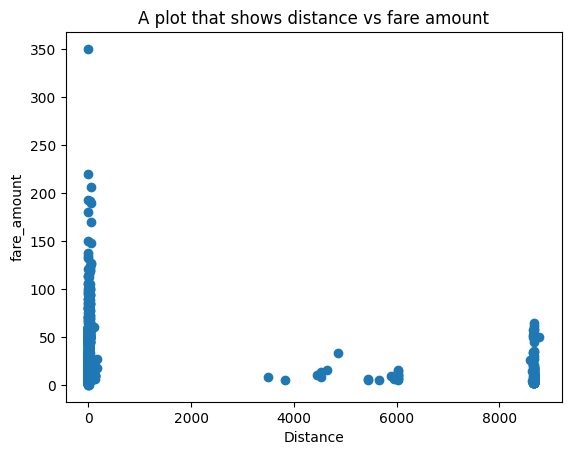

In [16]:
# Scatter plots are used to visualize the relationship between two variables by plotting
# data points on a 2D graph, where each point represents a combination of values from the two variables.

plt.scatter(data['Distance'], data['fare_amount'])
plt.title("A plot that shows distance vs fare amount")
plt.xlabel("Distance")
plt.ylabel("fare_amount")
plt.show()

# plt.scatter(x, y) is used to create the scatter plot. It takes the values from x and y and plots them as data points on the graph.
# plt.xlabel, plt.ylabel, and plt.title are used to add labels and a title to the plot.
# plt.show() is used to display the plot.
# on ides and jupyter notebook the plot is displayed on calling a plotting function
# If you are running your Python code in a non-interactive environment like a script,
# you would typically need to use plt.show() at the end of your script to display the plot.

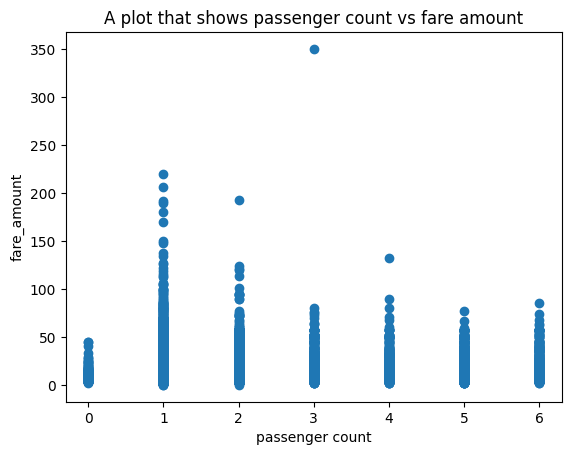

In [17]:
plt.scatter(data['passenger_count'], data['fare_amount'])
plt.title("A plot that shows passenger count vs fare amount")
plt.xlabel("passenger count")
plt.ylabel("fare_amount")
plt.show()

In [18]:
'''
data['Distance'] = selects Distance column
data['Distance'] > 80 = It is a conditional statement that checks which rows in the 'Distance' column have values greater than 80.
data[data['Distance'] > 80] = Filters the rows which pass the previous criteria
data[data['Distance'] > 80].index = .index is used to retrieve the row labels of the filtered DataFrame.
                                     index is used to refer to row index . e.g.[2, 4, 5]
inplace = the rows / columns using drop() are deleted in the original dataframe itself no copy is created
'''
data.drop(data[data['Distance'] > 80].index, inplace = True)
data.drop(data[data['Distance'] == 0].index, inplace = True)
data.drop(data[data['Distance'] < 0].index, inplace = True)
data.drop(data[data['fare_amount'] == 0].index, inplace = True)
data.drop(data[data['fare_amount'] < 0].index, inplace = True)
data.drop(data[data['passenger_count'] > 6].index,inplace=True)

# Outliers have been removed


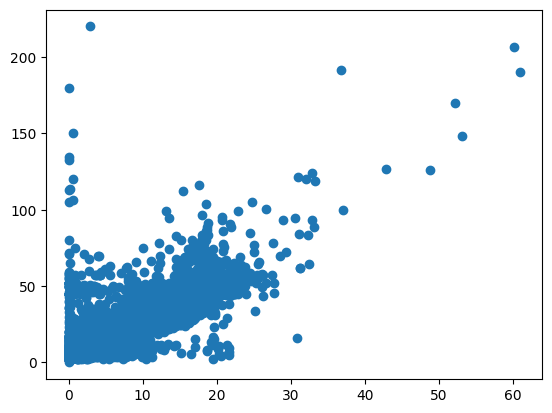

In [19]:
plt.scatter(data['Distance'], data['fare_amount'])

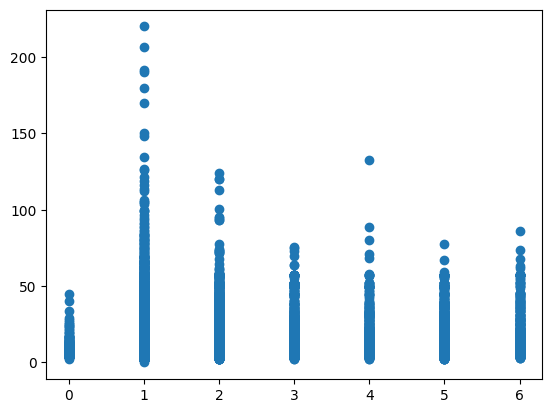

In [20]:
plt.scatter(data['passenger_count'], data['fare_amount'])

# OBJECT type Data


In [21]:
#  we can see this column has object type data
data['pickup_datetime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 51961 entries, 0 to 53587
Series name: pickup_datetime
Non-Null Count  Dtype 
--------------  ----- 
51961 non-null  object
dtypes: object(1)
memory usage: 811.9+ KB


Handling object type data in a Pandas DataFrame typically involves dealing with non-numeric or non-standard data types, such as strings, dates, and categorical variables. Depending on the specific type of object data you have, there are several common tasks and techniques you can use:

1. <b> Converting Object Types: </b>
<br>
<font color='blue'>df['Date'] = pd.to_datetime(df['Date'])</font>
<br>
 ->Convert a date column to datetime objects
 <br><br>
<font color='blue'>df['NumericColumn'] = df['NumericColumn'].astype(float)
</font>
<br>
 ->Convert a string column to float
 <br><br>
2. <b>Working with Categorical Data:</b><br>
  Use  pd.Categorical()  to convert object-type columns into categorical data types if the data has a limited number of unique values.
  (<font size=2>Categorical data types are more memory-efficient compared to storing the same data as strings or objects. This is especially beneficial when working with large datasets, as it can significantly reduce memory usage</font>).


3. <b>Text Processing:</b><br>
    If object-type columns contain text data, you can perform text processing operations using string methods provided by Pandas.<br>
    <font color='blue'>df['TextColumn'] = df['TextColumn'].str.upper()</font>
     <br>->Convert text to uppercase
4.  <b>Handling Missing Values:</b><br>
    Use .fillna() to fill missing values in object-type columns with appropriate values.<br>
Use .dropna() to remove rows with missing values if necessary.

5.  <b>Data Encoding:</b>
<br>For machine learning tasks, you might need to encode object-type categorical data into numeric representations using techniques like one-hot encoding or label encoding.

6.  <b>Extracting Information:</b><br>
Extract relevant information from object-type columns, such as extracting parts of dates (e.g., day, month) or splitting text into multiple columns













In [22]:
# handling object type data
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
'''
dt accessor simplifies working with datetime data in Pandas by providing a
consistent way to access and manipulate datetime components.
'''
data['Year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['Day'] = data['pickup_datetime'].dt.day
data['Day of Week'] = data['pickup_datetime'].dt.dayofweek
data['Hour'] = data['pickup_datetime'].dt.hour

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Day of Week']=le.fit_transform(data['Day of Week'])
data['Day of Week']

0        3
1        4
2        0
3        4
4        3
        ..
53582    3
53584    3
53585    5
53586    0
53587    1
Name: Day of Week, Length: 51961, dtype: int64

In [24]:
data.drop(['pickup_datetime'],axis=1,inplace=True)
# data['counter'] = 1

# Finding Correlation


In [25]:
# this calculates a correlation matrix between the columns pairwise
corr = data.corr()

# this method applies a background gradient style to the correlation matrix DataFrame
corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Hour
fare_amount,1.000000,0.011981,-0.008799,0.010662,-0.008559,0.010483,0.876984,0.120204,0.028926,0.003153,0.001703,-0.009841
pickup_longitude,0.011981,1.000000,-0.992464,0.999898,-0.992433,0.012173,0.005452,0.013514,-0.006546,0.020135,0.010443,-0.001470
pickup_latitude,-0.008799,-0.992464,1.000000,-0.992452,0.999938,-0.013148,-0.003305,-0.014963,0.007778,-0.021425,-0.011396,0.002882
dropoff_longitude,0.010662,0.999898,-0.992452,1.000000,-0.992421,0.012178,0.004625,0.013459,-0.006483,0.020192,0.010750,-0.002319
dropoff_latitude,-0.008559,-0.992433,0.999938,-0.992421,1.000000,-0.013116,-0.002608,-0.014892,0.007744,-0.021432,-0.011359,0.002869
passenger_count,0.010483,0.012173,-0.013148,0.012178,-0.013116,1.000000,0.010185,0.000799,0.009124,0.004661,0.033974,0.016433
Distance,0.876984,0.005452,-0.003305,0.004625,-0.002608,0.010185,1.000000,0.025040,0.017933,0.001779,0.011951,-0.023242
Year,0.120204,0.013514,-0.014963,0.013459,-0.014892,0.000799,0.025040,1.000000,-0.119501,-0.011287,0.002415,0.002687
Month,0.028926,-0.006546,0.007778,-0.006483,0.007744,0.009124,0.017933,-0.119501,1.000000,-0.013640,-0.006223,-0.007408
Day,0.003153,0.020135,-0.021425,0.020192,-0.021432,0.004661,0.001779,-0.011287,-0.013640,1.000000,0.004312,0.005987


The above results show the fare has a high statistial relation with distance and somewhat decent relation with year feature


# Linear Regression


# with just a single feature taken

In [26]:
X=data['Distance'].values.reshape(-1,1)

In [27]:
# The .values.reshape(-1, 1) operation is used to reshape a 1-D NumPy array (or a Pandas Series)
#  into a 2-D array with a single column. This is often done when working with machine learning libraries
# like scikit-learn, which expect input features to be in a 2-D format.
y = data['fare_amount'].values.reshape(-1, 1)

Here's what this operation does step by step:

.values: This part extracts the values from a Pandas Series or DataFrame column, returning them as a NumPy array. If you have a Pandas Series s, s.values gives you the underlying NumPy array.

.reshape(-1, 1): After extracting the values, this part of the code reshapes the 1-D array into a 2-D array. The -1 in the reshape function indicates that NumPy should automatically calculate the size of one of the dimensions based on the size of the data and the specified size of the other dimension. In this case, you specify 1 for the number of columns, and NumPy calculates the number of rows necessary to maintain all the data. This effectively converts the 1-D array into a 2-D array with a single column.

In [28]:
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# x_std = std.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
#  Applying linear Regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.770
Test set score: 0.765


 model.score() = It gives the R Squred value.
<br>
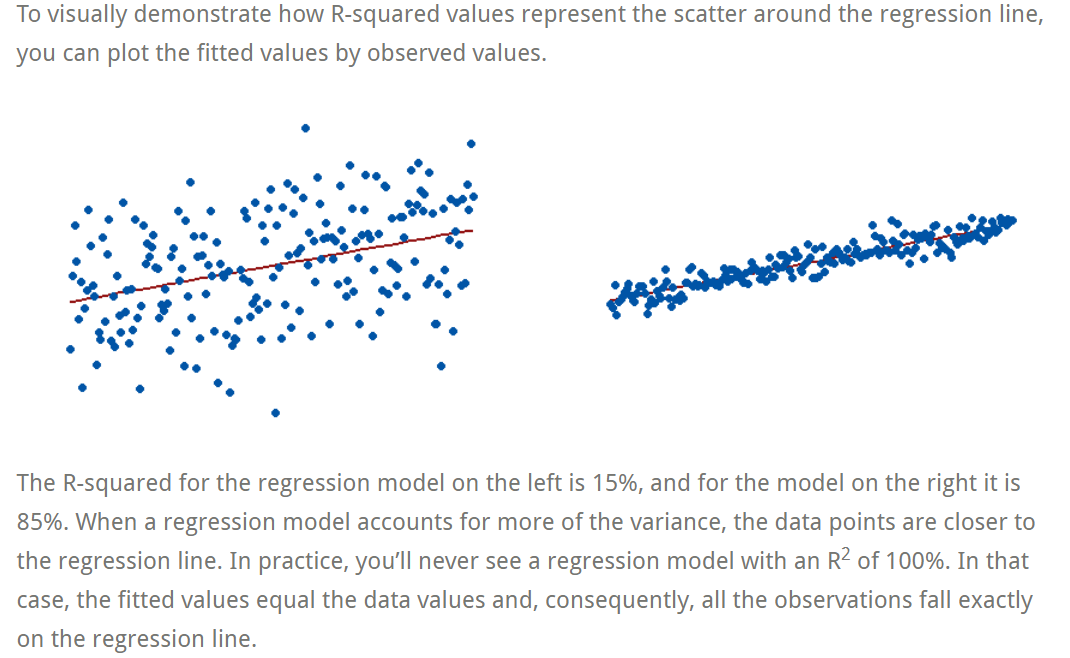

In [31]:
#  predcited values of test set
y_pred = l_reg.predict(X_test)

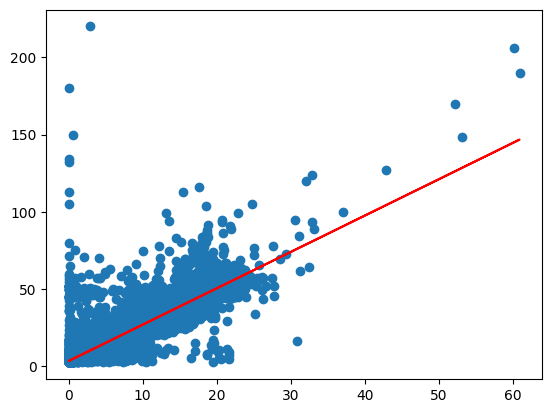

In [32]:
# scatter shows the x train and y train data points
# plot shows the line of x train and y value predicted by the model
plt.scatter(X_train,y_train)
plt.plot(X_train, l_reg.predict(X_train),color="red")

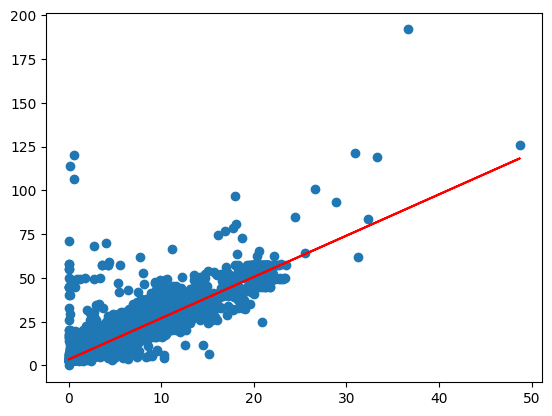

In [33]:
plt.scatter(X_test,y_test)
plt.plot(X_test, l_reg.predict(X_test),color="red")

# With two features Distance and Year

In [34]:
X = np.column_stack((data['Distance'],data['Year']))
y = data['fare_amount'].values.reshape(-1, 1)

In [35]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_std = std.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.780
Test set score: 0.774


In [38]:
y_pred = l_reg.predict(X_test)

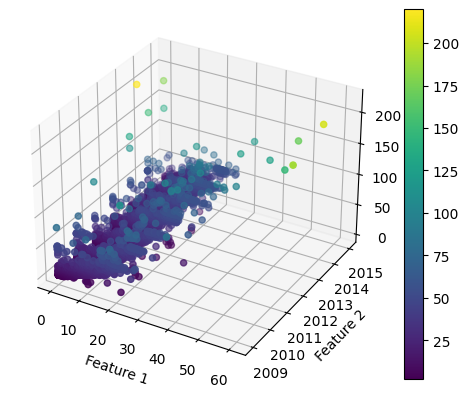

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_matrix has two columns representing features, and y_labels is your 1D array of labels/predictions

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the two columns as X data points
X_data_points = X_train  # Assuming X_matrix is a Pandas DataFrame or a NumPy array
y_labels=y_train
# Plot the data points in 3D
scatter = ax.scatter(X_data_points[:, 0], X_data_points[:, 1], y_labels, c=y_labels, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label/Prediction')

# Add a colorbar for the scatter plot
fig.colorbar(scatter)

# # Show the plot
# X, Y = np.meshgrid(X_data_points[:, 0], X_data_points[:, 1])

# # Plot the 3D surface using the X, Y, and Z (y_pred) values
# ax.plot_surface(X, Y, y_pred.reshape(X.shape), cmap='viridis')

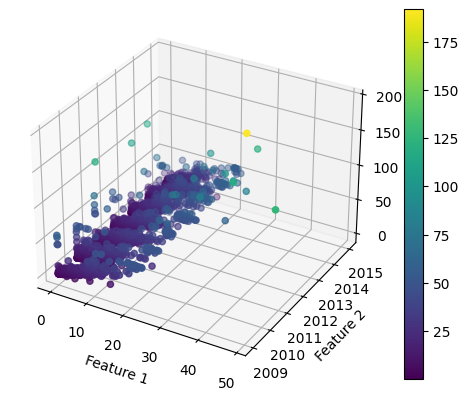

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the two columns as X data points
X_data_points = X_test  # Assuming X_matrix is a Pandas DataFrame or a NumPy array
# Plot the data points in 3D
scatter = ax.scatter(X_data_points[:, 0], X_data_points[:, 1], y_test, c=y_test, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label/Prediction')

# Add a colorbar for the scatter plot
fig.colorbar(scatter)